---
# Drzewa decyzyjne #
---

## 1. Pobranie i analiza danych uczących ##
Będziemy dziś pracować na [zbiorze danych](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) uzyskanych z biopsji (aspiracyjnej cienkoigłowej) piersi. Zadaniem naszym jest wytrenowanie klasyfikatora, który po cechach wyników biopsji będzie klasyfikował guz jako łagodny lub złośliwy.

In [12]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Gdy znacie zestaw danych i chcecie od razu przejść do treningu, opcja 'return_X_y = True' jest dla Was!
#X, y = load_breast_cancer(return_X_y=True)

# Ale to nasz pierwszy raz z tym zestawem danych, więc sprawdźmy co jest w środku. Wykorzystajcie analizę danych zrobioną dla irysów w notebooku z naiwnym klasyfikatorem Bayesa.
cancer = load_breast_cancer()

# Sprawdźcie opis zestawu danych, a także nazwy klas i nazwy cech
# Sprawdźcie ile jest przykładów z obu klas
# Zróbcie violinploty dla wszystkich cech LUB przyjrzyjcie się zakresom liczbowym cech. 
# Co o nich myślicie? Czy sprawią jakiś problem? Czy powinniśmy coś z nimi zrobić? PODPOWIEDŹ: TAK ;D
# Jeśli nie możecie wymyślić gdzie leży pułapka, to dajcie mi znać, nie idźcie dalej, wymyślimy to razem :)

In [13]:
#nazwy klas:
print(cancer['target_names'])

['malignant' 'benign']


In [14]:
#nazwy cech:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
#przykladowe dane w zbiorze:
print(cancer.data[5])
print(cancer.target[5])

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
0


In [16]:
#len(cancer.data[cancer.target == 1])
#data2 = [ np.zeros((len(cancer.target == 1), len(cancer['feature_names']))) ]

In [17]:
#data = [np.zeros((len(cancer.data[cancer.target == i]), len(cancer['feature_names']))) for i in range(len(cancer['target_names']))]

In [18]:
"""plt.figure()
for f, f_name in enumerate(cancer['feature_names']):


    fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(8, 8))

    plt.subplot(5,6,f+1)
    data = [np.zeros((len(cancer.data[cancer.target == i]), len(cancer['feature_names']))) for i in range(len(cancer['target_names']))]
    for k in range(len(cancer['target_names'])):
        data[k][:,f] = cancer.data[cancer.target==k,f]
    axes[(f-1)//6, (f-1)%6].violinplot(data[0])
    #plt.xlabel(str(f)+' '+ f_name)
plt.show() """

"plt.figure()\nfor f, f_name in enumerate(cancer['feature_names']):\n\n\n    fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(8, 8))\n\n    plt.subplot(5,6,f+1)\n    data = [np.zeros((len(cancer.data[cancer.target == i]), len(cancer['feature_names']))) for i in range(len(cancer['target_names']))]\n    for k in range(len(cancer['target_names'])):\n        data[k][:,f] = cancer.data[cancer.target==k,f]\n    axes[(f-1)//6, (f-1)%6].violinplot(data[0])\n    #plt.xlabel(str(f)+' '+ f_name)\nplt.show() "

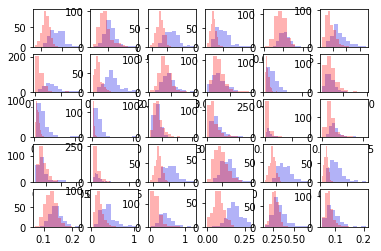

In [19]:

color_map = {0: (0, 0, .9), 1: (1, 0, 0)}
colors = [color_map[y] for y in cancer.target]


for f, f_name in enumerate(cancer['feature_names']):
    plt.subplot(5,6,f+1)
    for k in range(2): # k - klasa
        plt.hist(cancer.data[cancer.target==k,f],color=color_map[k],alpha=0.3)

<Figure size 432x288 with 0 Axes>

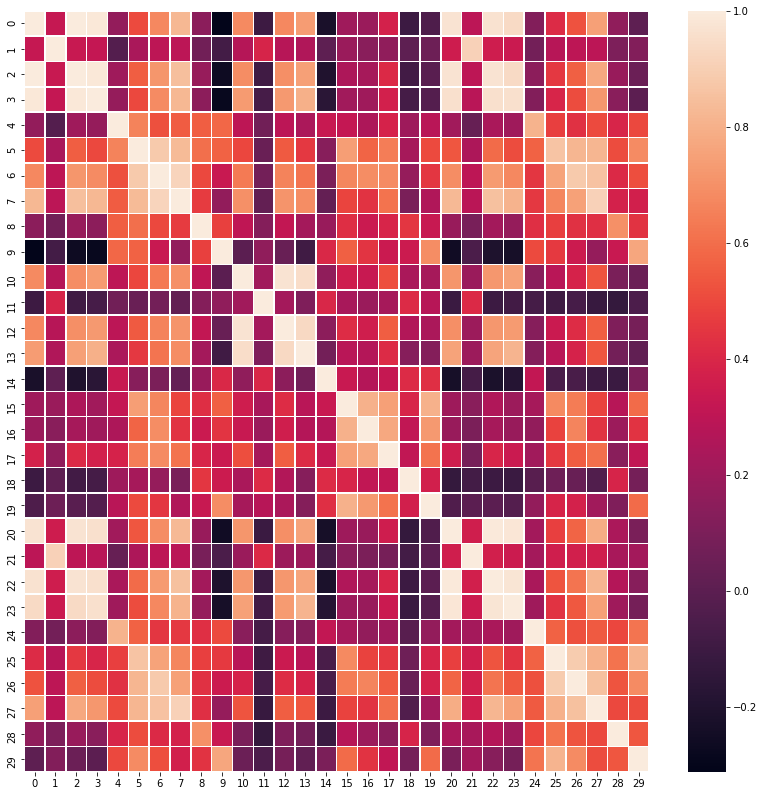

In [27]:
# Zróbcie wykres korelacji między cechami (tym razem prawdziwej korelacji ;) nie jak w irysach!
# X zawiera Wasze dane uczące
X, y = load_breast_cancer(return_X_y=True)

plt.figure()
f, ax = plt.subplots(figsize=(14,14))
corr_plot = sns.heatmap(np.corrcoef(X, rowvar=False), annot=False, linewidths=.5, fmt='.1f', ax=ax)

# Czego się dowiedzieliście z tego wykresu?

In [21]:
from sklearn.model_selection import train_test_split

# Podziel dane na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# Tutaj unikamy pułapki z komórki nr 1 :)

## 2. Importujemy klasyfikator w postaci drzewa decyzyjnego ##
W bibliotece scikit-learn drzewa decyzyjne implementowane są przez klasę [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Szczegóły implementacji opisane są [tutaj](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use).

Najprostszy przykład:

In [23]:
from sklearn import tree
#X = [[0, 0], [1, 1]]
#Y = [0, 1]
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X, Y)

Po dopasowaniu można przewidywać przynależność nowych przykładów:

In [24]:
#clf.predict([[0., 0.6]])

array([1])

Albo estymować prawdopodobieństwo przynależności do klas:

In [25]:
#clf.predict_proba([[1, 1]])

array([[0., 1.]])

## 3. Klasyfikacja guzów i wizualizacja drzewa ##

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
!pip install pydot

Po wytrenowaniu można zilustrować wynik za pomocą narzędzia Graphiz (wymaga to zainstalowania w systemie tego narzędzia), oraz doinstalowania do pythona biblioteki pydot:

In [34]:
# Nazwałam tu klasyfikator 'clf'. Jeśli zadeklarowaliście go pod inną nazwą, to:
# clf = Wasza_Nazwa

from sklearn.externals.six import io
import pydot 
dot_data = io.StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("cancer.pdf")

Można też podejrzeć wyniki w pythonie:

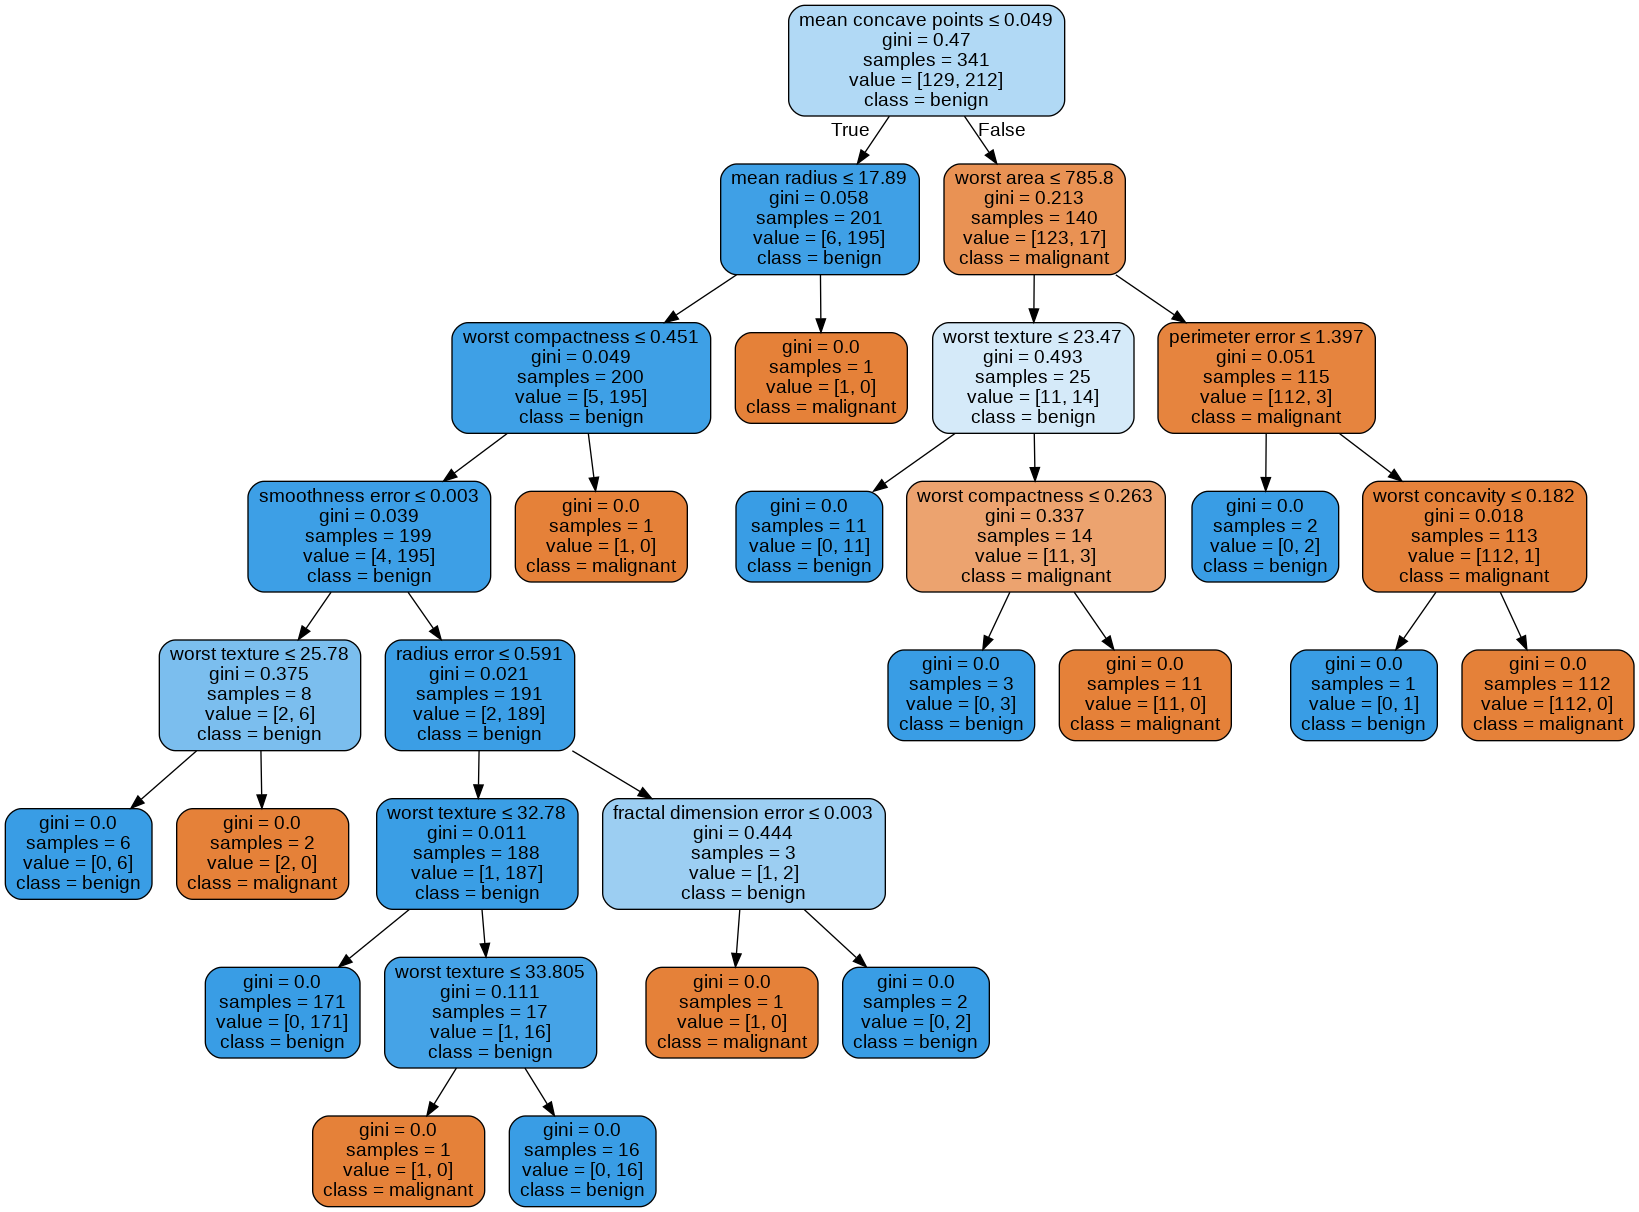

In [35]:
from IPython.display import Image  
dot_data = io.StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

Czym jest "Gini", "samples", "value" oraz "class"? Co oznaczają kolory?

Gini - miara pochodzi od włoskiego statystyka Corrado Giniego, któy pierwszy raz użył tej miary do opisu nierówności dochodu w społeczeństwie. W przypadku drzew decyzyjnych opisuje on rozkład klas występujących w danym węźle drzewa. Definiujemy go dokładnie jako:

G = 1 - (b/(b+m))^2 - (m/(b+m))^2, 
gdzie b - przypadki z klasy benign oraz m - przypadki z klasy malignant

Intuicyjnie opisuje on jak bardzo są "wymieszane" klasy w danym węźle. Gini wynoszący 0 oznacza zupełne rozdzielenie (obecna tylko jedna klasa), zaś Gini róny 1, oznacza dokładne wymieszanie klas (równoliczne przypadki). Algorytm drzewa decyzyjnego minimalizuje w każdym z węzłów współczynnik Giniego, czyli stara się by podejmowe decyzje jak najlepiej dzieliły badane przypadki.

samples - liczba skalsyfikowanych  przypadków

value - mówi o tym ile jest przypadków każdej z klas (np. [1,6] oznacza, że jest jeden przypadek w klasie 0 oraz 6 przypadków w klasie 1)

class - pełna nazwa klasy, do której przyporządkowaliśmy dane przypadki

skala kolorystyczna - oznacza przynależność przypadków do danych klas. Jeżeli sytuacja w gałęzi jest pośrednia (np. [6,2]) to wtedy kolor jest wypadkowym kolorem pochodzącym od dwóch bazowych niebieskiego oraz pomarańczowego

In [ ]:
# Alternatywą jest użycie wbudowanej metody 'plot_tree', ale wydaje mi się mniej przyjazna:
#tree.plot_tree(clf, feature_names=cancer.feature_names)

Oczywiście oceniamy jakość tej klasyfikacji:

In [36]:
# Raport jakości klasyfikacji + Wasze ulubione miary jakości.
from sklearn.metrics import classification_report, confusion_matrix
print("classification report:")
print(classification_report(y, clf.predict(X), target_names=cancer.target_names))
print("confusion matrix:")
print(cancer.target_names)
print(confusion_matrix(y, clf.predict(X)))


classification report:
              precision    recall  f1-score   support

   malignant       0.94      0.95      0.94       212
      benign       0.97      0.96      0.97       357

    accuracy                           0.96       569
   macro avg       0.95      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569

confusion matrix:
['malignant' 'benign']
[[202  10]
 [ 14 343]]


Co o niej myślicie? A sprawdźcie na wszelki wypadek klasyfikację danych treningowych?

Klasyfikacja jest bardzo udana, chociaż nieco niższa niż danych treningowych, jednak wciąz daje bardzo zadowalające wyniki.

In [37]:
# Raport klasyfikacji w procesie treningowym
print("classification report:")
print(classification_report(y_train, clf.predict(X_train), target_names=cancer.target_names))
print("confusion matrix:")
print(cancer.target_names)
print(confusion_matrix(y_train, clf.predict(X_train)))

classification report:
              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00       129
      benign       1.00      1.00      1.00       212

    accuracy                           1.00       341
   macro avg       1.00      1.00      1.00       341
weighted avg       1.00      1.00      1.00       341

confusion matrix:
['malignant' 'benign']
[[129   0]
 [  0 212]]


Co to oznacza? :)

Algorytm drzewa decyzyjnego jest dosyć łatwo nauczyć osiągnia 100% zgodności ze zbiorem testowym, gdyż wymaga to po prostu dodania kilku nowych warunków. Jednakże w tym przypadku należy zwrócić uwagę na przeuczenie modelu.

## 4. Regularyzacja drzewa przez przycinanie##

A teraz crème de la crème uczenia maszynowego, czyli regularyzacja. Pamiętacie na czym ogólnie polega?

W przypadku drzew decyzyjnych polega przede wszystkim na:
- przycinaniu gałęzi i liści (czyli zmniejszaniu liczby węzłów) przez kontrolę parametru min_samples_leaf: mianowicie daje dolny limit na jak drobne gałązki może drzewo tworzyć. Jeśli kolejna gałązka miałaby rozpatrywać tylko liczbę przykładów < min_sample_leaf, to nie tworzy się. Domyślnie, min_sample_leaf = ?
- ograniczaniu głębokości drzewa, czyli jak wiele rozgałęzień może się stworzyć. Domyślnie max_depth = None. Co to znaczy? Patrz [tu](https://scikit-learn.org/0.22/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

Macie dwa wyjścia. Po pierwsze, poszukać optymalnych hiperparametrów ręcznie, jak ostatnio robiliście. Po drugie, skorzystać (z rozwagą!) z gotowej metody cost_complexity_pruning_path, w której bawicie się jednym parametrem 'cost complexity parameter', czyli ccp_alpha. Tutaj macie [tutorial](https://scikit-learn.org/0.22/auto_examples/tree/plot_cost_complexity_pruning.html). Jeśli będziecie korzystać z tej funkcji, to proszę o bogate komentarze, co się po drodze dzieje :)

Ostatecznym wynikiem ma być uzyskanie optymalnego drzewa oraz jego wizualizacja wraz z raportem klasyfikacji i macierzą pomyłek.

Powodzenia! :)

classification report dla treningu:
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.97       129
      benign       0.99      0.98      0.98       212

    accuracy                           0.98       341
   macro avg       0.98      0.98      0.98       341
weighted avg       0.98      0.98      0.98       341

confusion matrix dla treningu:
['malignant' 'benign']
[[126   3]
 [  4 208]]
classification report dla wszystkich danych:
              precision    recall  f1-score   support

   malignant       0.94      0.96      0.95       212
      benign       0.98      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.96      0.96       569
weighted avg       0.97      0.96      0.96       569

confusion matrix dla wszystkich danych:
['malignant' 'benign']
[[204   8]
 [ 12 345]]


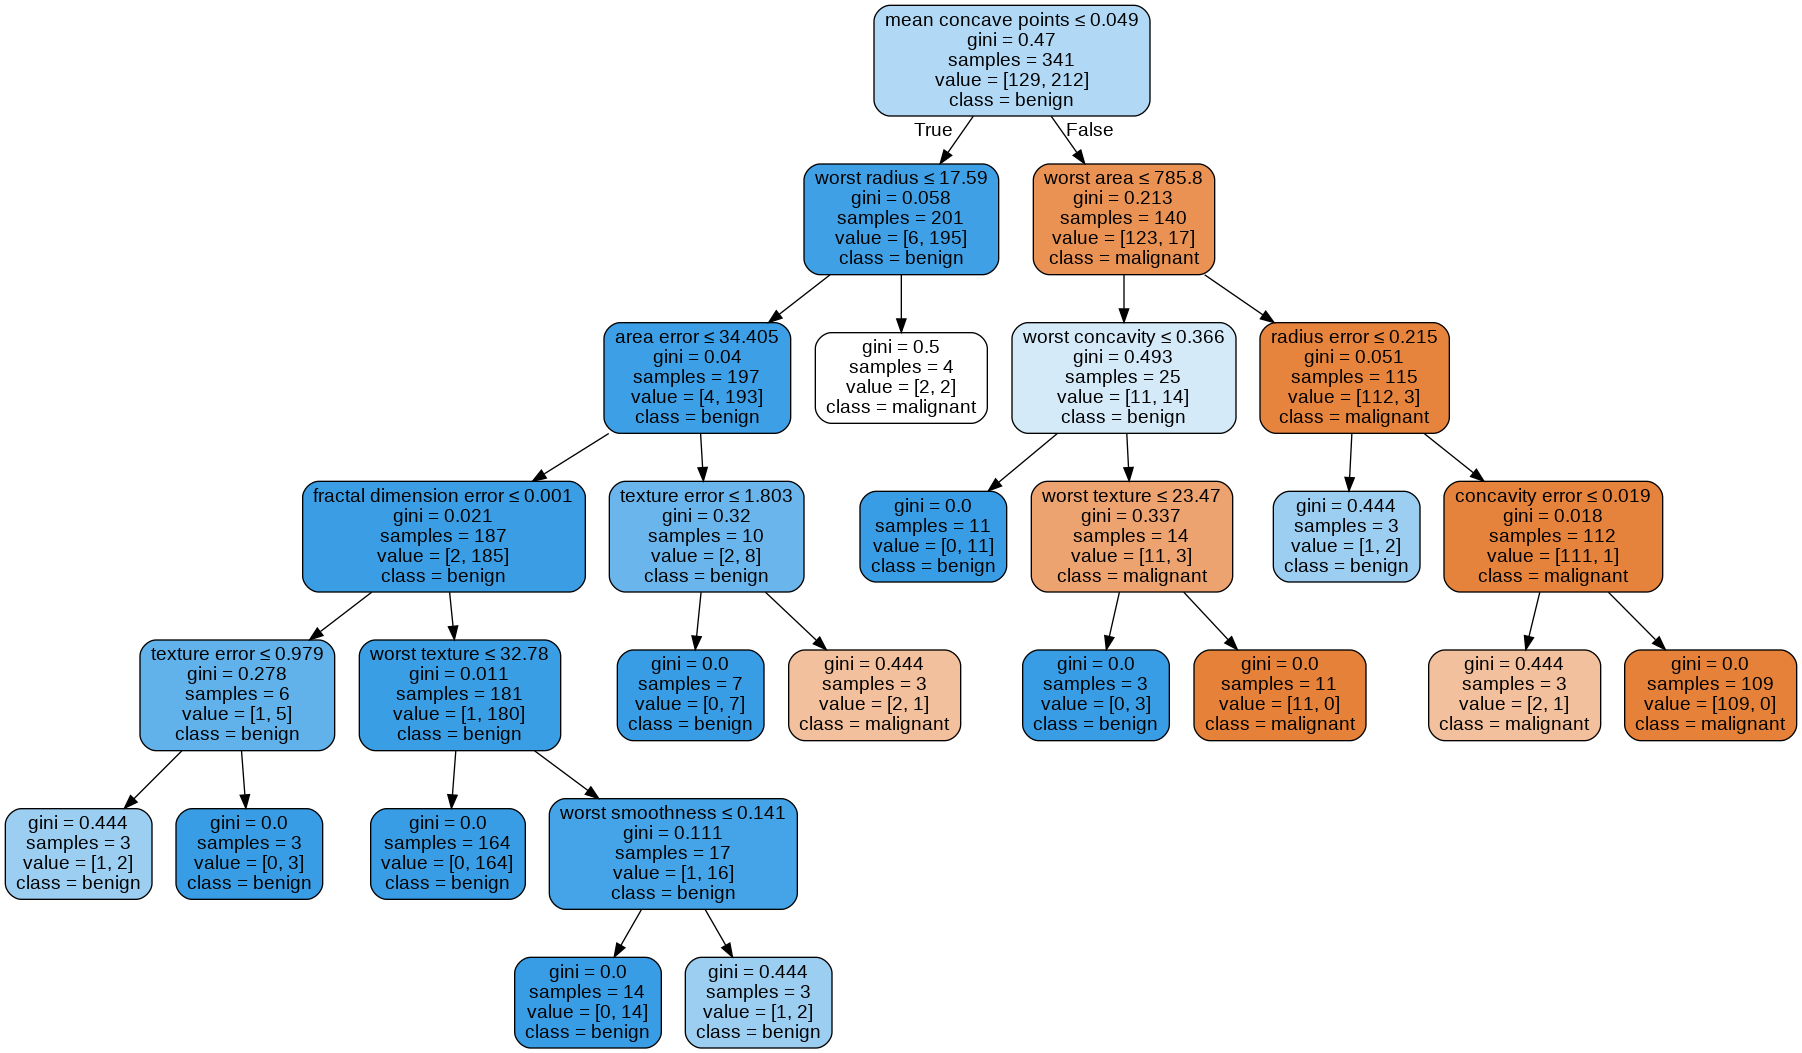

In [42]:
###   REGULARYZACJA POPRZEZ ZWIĘKSZENIE MINIMALNEJ LICZBY PRZYKŁADÓW W KAŻDYM Z LIŚCI   ####

#uczenie
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf = tree.DecisionTreeClassifier(min_samples_leaf = 3)
clf = clf.fit(X_train, y_train)

#sprawdzenie miary jakości
print("classification report dla treningu:")
print(classification_report(y_train, clf.predict(X_train), target_names=cancer.target_names))
print("confusion matrix dla treningu:")
print(cancer.target_names)
print(confusion_matrix(y_train, clf.predict(X_train)))

print("classification report dla wszystkich danych:")
print(classification_report(y, clf.predict(X), target_names=cancer.target_names))
print("confusion matrix dla wszystkich danych:")
print(cancer.target_names)
print(confusion_matrix(y, clf.predict(X)))

#plottowanie
dot_data = io.StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("cancer.pdf")

dot_data = io.StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

Proste zwiększenie minimalnej liczby przykładów w każdym z liści niestety prowadzi do niemożności precyzyjnej klasyfikacji wszystkich przykładów (zostają przypadki w rodzaju [1,2]. W porównaniu z drzewem bez tego ograniczenia miary jakości są odrobinę (0.01) lepsze, co może świadczyć o pewnej generalizacji modelu.

classification report dla treningu:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97       129
      benign       0.98      0.98      0.98       212

    accuracy                           0.98       341
   macro avg       0.98      0.98      0.98       341
weighted avg       0.98      0.98      0.98       341

confusion matrix dla treningu:
['malignant' 'benign']
[[125   4]
 [  4 208]]
classification report dla wszystkich danych:
              precision    recall  f1-score   support

   malignant       0.94      0.92      0.93       212
      benign       0.95      0.97      0.96       357

    accuracy                           0.95       569
   macro avg       0.95      0.94      0.95       569
weighted avg       0.95      0.95      0.95       569

confusion matrix dla wszystkich danych:
['malignant' 'benign']
[[195  17]
 [ 12 345]]


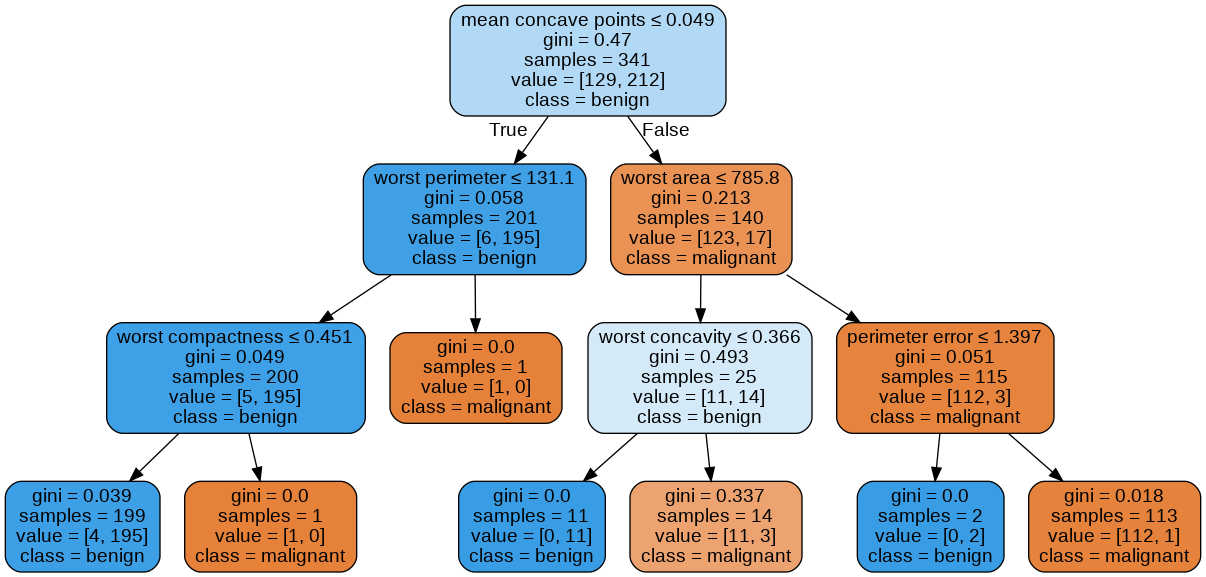

In [46]:
###   REGULARYZACJA POPRZEZ ZWIĘKSZENIE MINIMALNEJ LICZBY PRZYKŁADÓW W KAŻDYM Z LIŚCI   ####

#uczenie
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_depth = 3)
clf = clf.fit(X_train, y_train)

#sprawdzenie miary jakości
print("classification report dla treningu:")
print(classification_report(y_train, clf.predict(X_train), target_names=cancer.target_names))
print("confusion matrix dla treningu:")
print(cancer.target_names)
print(confusion_matrix(y_train, clf.predict(X_train)))

print("classification report dla wszystkich danych:")
print(classification_report(y, clf.predict(X), target_names=cancer.target_names))
print("confusion matrix dla wszystkich danych:")
print(cancer.target_names)
print(confusion_matrix(y, clf.predict(X)))

#plottowanie
dot_data = io.StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("cancer.pdf")

dot_data = io.StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

Przy niewielkiej głębokości drzewa (3) spadają miary jakości, trudno stwierdzić czy poprawia to generalizację.

classification report dla treningu:
              precision    recall  f1-score   support

   malignant       1.00      0.97      0.98       129
      benign       0.98      1.00      0.99       212

    accuracy                           0.99       341
   macro avg       0.99      0.98      0.99       341
weighted avg       0.99      0.99      0.99       341

confusion matrix dla treningu:
['malignant' 'benign']
[[125   4]
 [  0 212]]
classification report dla wszystkich danych:
              precision    recall  f1-score   support

   malignant       0.96      0.92      0.94       212
      benign       0.95      0.98      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569

confusion matrix dla wszystkich danych:
['malignant' 'benign']
[[195  17]
 [  8 349]]


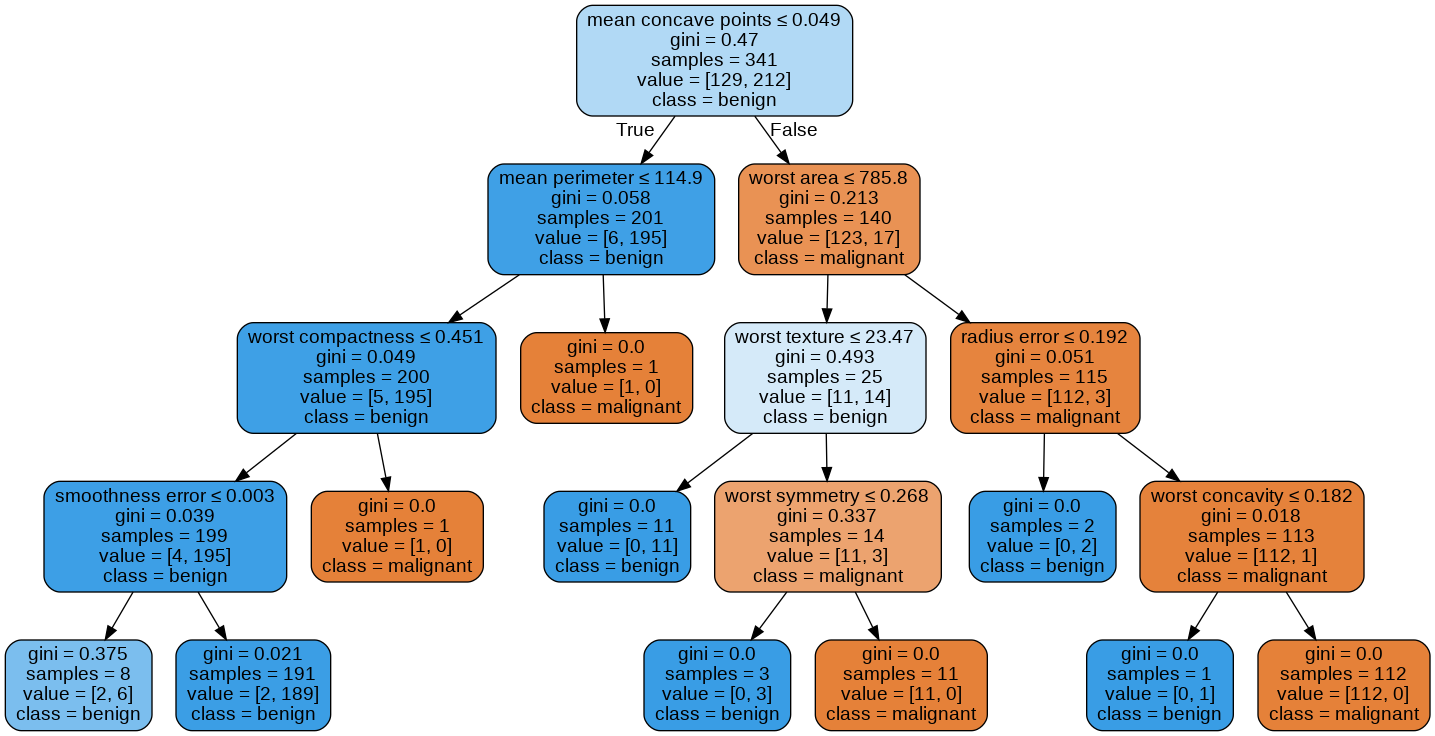

In [62]:
###   REGULARYZACJA POPRZEZ ZMNIEJSZENIE MAKSYMALENJ GŁĘBOKOŚCI   ####

#uczenie
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_depth = 4)
clf = clf.fit(X_train, y_train)

#sprawdzenie miary jakości
print("classification report dla treningu:")
print(classification_report(y_train, clf.predict(X_train), target_names=cancer.target_names))
print("confusion matrix dla treningu:")
print(cancer.target_names)
print(confusion_matrix(y_train, clf.predict(X_train)))

print("classification report dla wszystkich danych:")
print(classification_report(y, clf.predict(X), target_names=cancer.target_names))
print("confusion matrix dla wszystkich danych:")
print(cancer.target_names)
print(confusion_matrix(y, clf.predict(X)))

#plottowanie
dot_data = io.StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("cancer.pdf")

dot_data = io.StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

Zmniejszenie głębokości nie poprawia znacząco regularyzacji dla tgo zestawu danych. Miary jakości są bardzo podobne do tych bez żadnych ograniczeń głębokości. Zaletą takiego drzewa jest z kolei mniejsze zużycie zasobów obliczeniowych.

classification report dla treningu:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98       129
      benign       0.97      1.00      0.99       212

    accuracy                           0.98       341
   macro avg       0.99      0.98      0.98       341
weighted avg       0.98      0.98      0.98       341

confusion matrix dla treningu:
['malignant' 'benign']
[[123   6]
 [  0 212]]
classification report dla wszystkich danych:
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94       212
      benign       0.95      0.99      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569

confusion matrix dla wszystkich danych:
['malignant' 'benign']
[[192  20]
 [  4 353]]


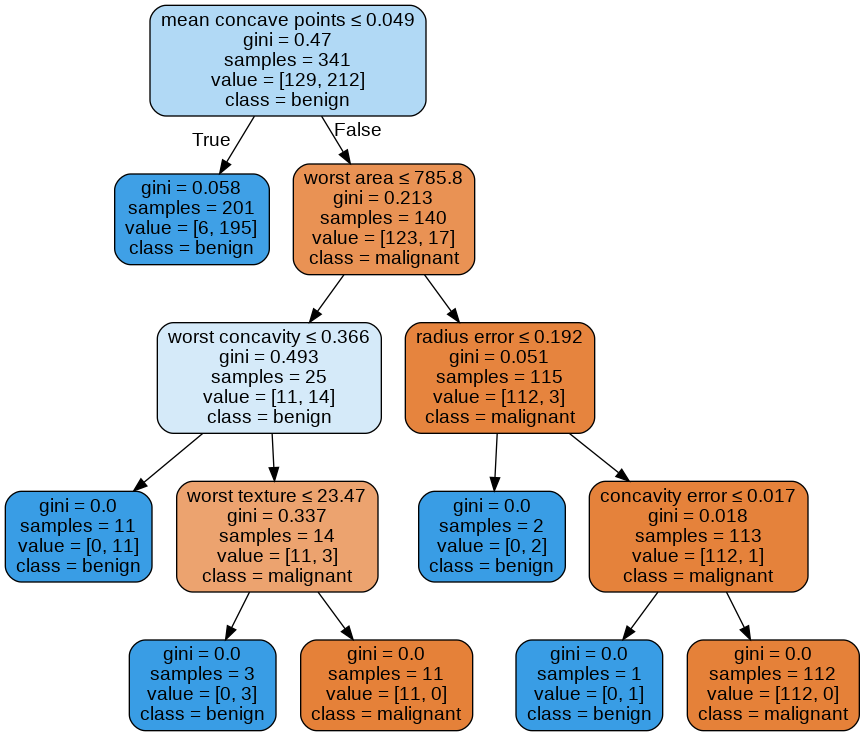

In [68]:
###   REGULARYZACJA POPRZEZ ZMNIEJSZENIE MAKSYMALENJ LICZBY ROZGAŁĘZIEŃ   ####

#uczenie
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_depth = 20, max_leaf_nodes= 7)
clf = clf.fit(X_train, y_train)

#sprawdzenie miary jakości
print("classification report dla treningu:")
print(classification_report(y_train, clf.predict(X_train), target_names=cancer.target_names))
print("confusion matrix dla treningu:")
print(cancer.target_names)
print(confusion_matrix(y_train, clf.predict(X_train)))

print("classification report dla wszystkich danych:")
print(classification_report(y, clf.predict(X), target_names=cancer.target_names))
print("confusion matrix dla wszystkich danych:")
print(cancer.target_names)
print(confusion_matrix(y, clf.predict(X)))

#plottowanie
dot_data = io.StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("cancer.pdf")

dot_data = io.StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

Można otrzymać bardzo podobne wyniki klasyfikacji dla prostszego drzewa, złożonego tylko z 7 nodów. 

classification report dla treningu:
              precision    recall  f1-score   support

   malignant       0.97      0.95      0.96       129
      benign       0.97      0.98      0.98       212

    accuracy                           0.97       341
   macro avg       0.97      0.97      0.97       341
weighted avg       0.97      0.97      0.97       341

confusion matrix dla treningu:
['malignant' 'benign']
[[123   6]
 [  4 208]]
classification report dla wszystkich danych:
              precision    recall  f1-score   support

   malignant       0.96      0.91      0.93       212
      benign       0.95      0.97      0.96       357

    accuracy                           0.95       569
   macro avg       0.95      0.94      0.95       569
weighted avg       0.95      0.95      0.95       569

confusion matrix dla wszystkich danych:
['malignant' 'benign']
[[193  19]
 [  9 348]]


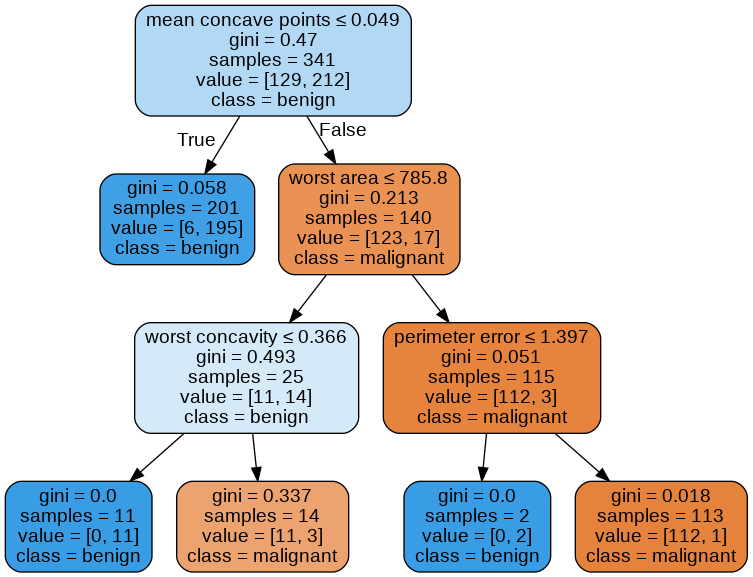

In [71]:
##  BARDZO UPROSZCZONE DRZEWO  ####

#uczenie
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_depth = 3, max_leaf_nodes= 5)
clf = clf.fit(X_train, y_train)

#sprawdzenie miary jakości
print("classification report dla treningu:")
print(classification_report(y_train, clf.predict(X_train), target_names=cancer.target_names))
print("confusion matrix dla treningu:")
print(cancer.target_names)
print(confusion_matrix(y_train, clf.predict(X_train)))

print("classification report dla wszystkich danych:")
print(classification_report(y, clf.predict(X), target_names=cancer.target_names))
print("confusion matrix dla wszystkich danych:")
print(cancer.target_names)
print(confusion_matrix(y, clf.predict(X)))

#plottowanie
dot_data = io.StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("cancer.pdf")

dot_data = io.StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

W tym przypadku moim celem było skonstruowanie bardzo prostego drzewa, by zminimalizować czas obliczeniowy. Co ciekawe, osiąga ono dosyć podobne rezultaty do poprzednio testowanych, dużo bardziej skomplikowanych drzew.